In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
import seaborn as sns
import itertools

In [2]:
train= pd.read_csv('train.csv')

In [3]:
advertisers = train['advertiser'].unique()
advertisers.sort()
advertisers

array([1458, 2259, 2261, 2821, 2997, 3358, 3386, 3427, 3476])

In [4]:
train_df = pd.DataFrame(data=[], index=[advertisers], columns=['Imps', 'Clicks', 'Cost', 
                                                             'CTR', 'CPM', 'eCPC'])

In [6]:
train['os'] = train['useragent'].str.split('_').str[0]
train['browser'] = train['useragent'].str.split('_').str[1]
x1 = train['slotwidth'].astype(str)
x2 = train['slotheight'].astype(str)
train['slot_size'] = x1+ '*' + x2

In [7]:

advertisers = train['advertiser'].unique()
advertisers.sort()
train_1458 = train[train['advertiser'] == 1458]
train_3358 = train[train['advertiser'] == 3358]
weekdays = train['weekday'].unique()
weekdays.sort()
def get_statistics(x_axis, column='click'):
    y_1458 = (train_1458.groupby([x_axis])[column].mean(), train_1458.groupby([x_axis])[column].sem())
    y_3358 = (train_3358.groupby([x_axis])[column].mean(), train_3358.groupby([x_axis])[column].sem())
    return y_1458, y_3358
# y_1458_weekday = train_1458.groupby(['weekday'])['click'].sum() / train_1458.groupby(['weekday'])['bidid'].nunique()
# y_3358_weekday = train_3358.groupby(['weekday'])['click'].sum() / train_3358.groupby(['weekday'])['bidid'].nunique()

def ctr_value(x_axis):
    return get_statistics(x_axis, column='click')

def price_value(x_axis):
    return get_statistics(x_axis, column='payprice')

# ctr_value('weekday')

In [8]:
def tidy_split(df, column, sep=',', keep=False):
    """
    Split the values of a column and expand so the new DataFrame has one split
    value per row. Filters rows where the column is missing.

    Params
    ------
    df : pandas.DataFrame
        dataframe with the column to split and expand
    column : str
        the column to split and expand
    sep : str
        the string used to split the column's values
    keep : bool
        whether to retain the presplit value as it's own row

    Returns
    -------
    pandas.DataFrame
        Returns a dataframe with the same columns as `df`.
    """
    indexes = list()
    new_values = list()
    df = df.dropna(subset=[column])
    for i, presplit in enumerate(df[column].astype(str)):
        values = presplit.split(sep)
        if keep and len(values) > 1:
            indexes.append(i)
            new_values.append(presplit)
        for value in values:
            indexes.append(i)
            new_values.append(value)
    new_df = df.iloc[indexes, :].copy()
    new_df[column] = new_values
    return new_df

def get_statistics_tag(column='click'):
    tag_1458 = tidy_split(train_1458, 'usertag')
    tag_3358 = tidy_split(train_3358, 'usertag')
    x = list(set(tag_1458['usertag']) | set(tag_3358['usertag']))
    y_1458 = (tag_1458.groupby(['usertag'])[column].mean(), tag_1458.groupby(['usertag'])[column].sem())
    y_3358 = (tag_3358.groupby(['usertag'])[column].mean(), tag_3358.groupby(['usertag'])[column].sem())
    return x, y_1458, y_3358

def ctr_value_tag():
    return get_statistics_tag(column='click')

def price_value_tag():
    return get_statistics_tag(column='payprice')



In [9]:
import matplotlib
import matplotlib.pyplot as plt


x = weekdays + 1

def plot_advertisers(x, y1, y2, x_label, y_label='CTR', line=False):
    names = list(sorted(set(y1[0].index) | set(y2[0].index)))
    numbers = range(len(names))
    if line == True:
        plt.errorbar(numbers,y1[0][names], fmt='o-', label='1458', yerr=y1[1][names])
        plt.errorbar(numbers,y2[0][names], fmt='o-', label='3358', yerr=y2[1][names])

    else: 
        plt.errorbar(numbers,y1[0][names], fmt='o', label='1458', yerr=y1[1][names])
        plt.errorbar(numbers,y2[0][names], fmt='o', label='3358', yerr=y2[1][names])
    plt.legend(loc='upper left');
    plt.xticks(numbers, names, rotation='vertical')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend(loc=0)

def plot_advertisers_price(x, y1, y2, x_label, line):
    return plot_advertisers(x, y1, y2, x_label, y_label='Price', line=line)

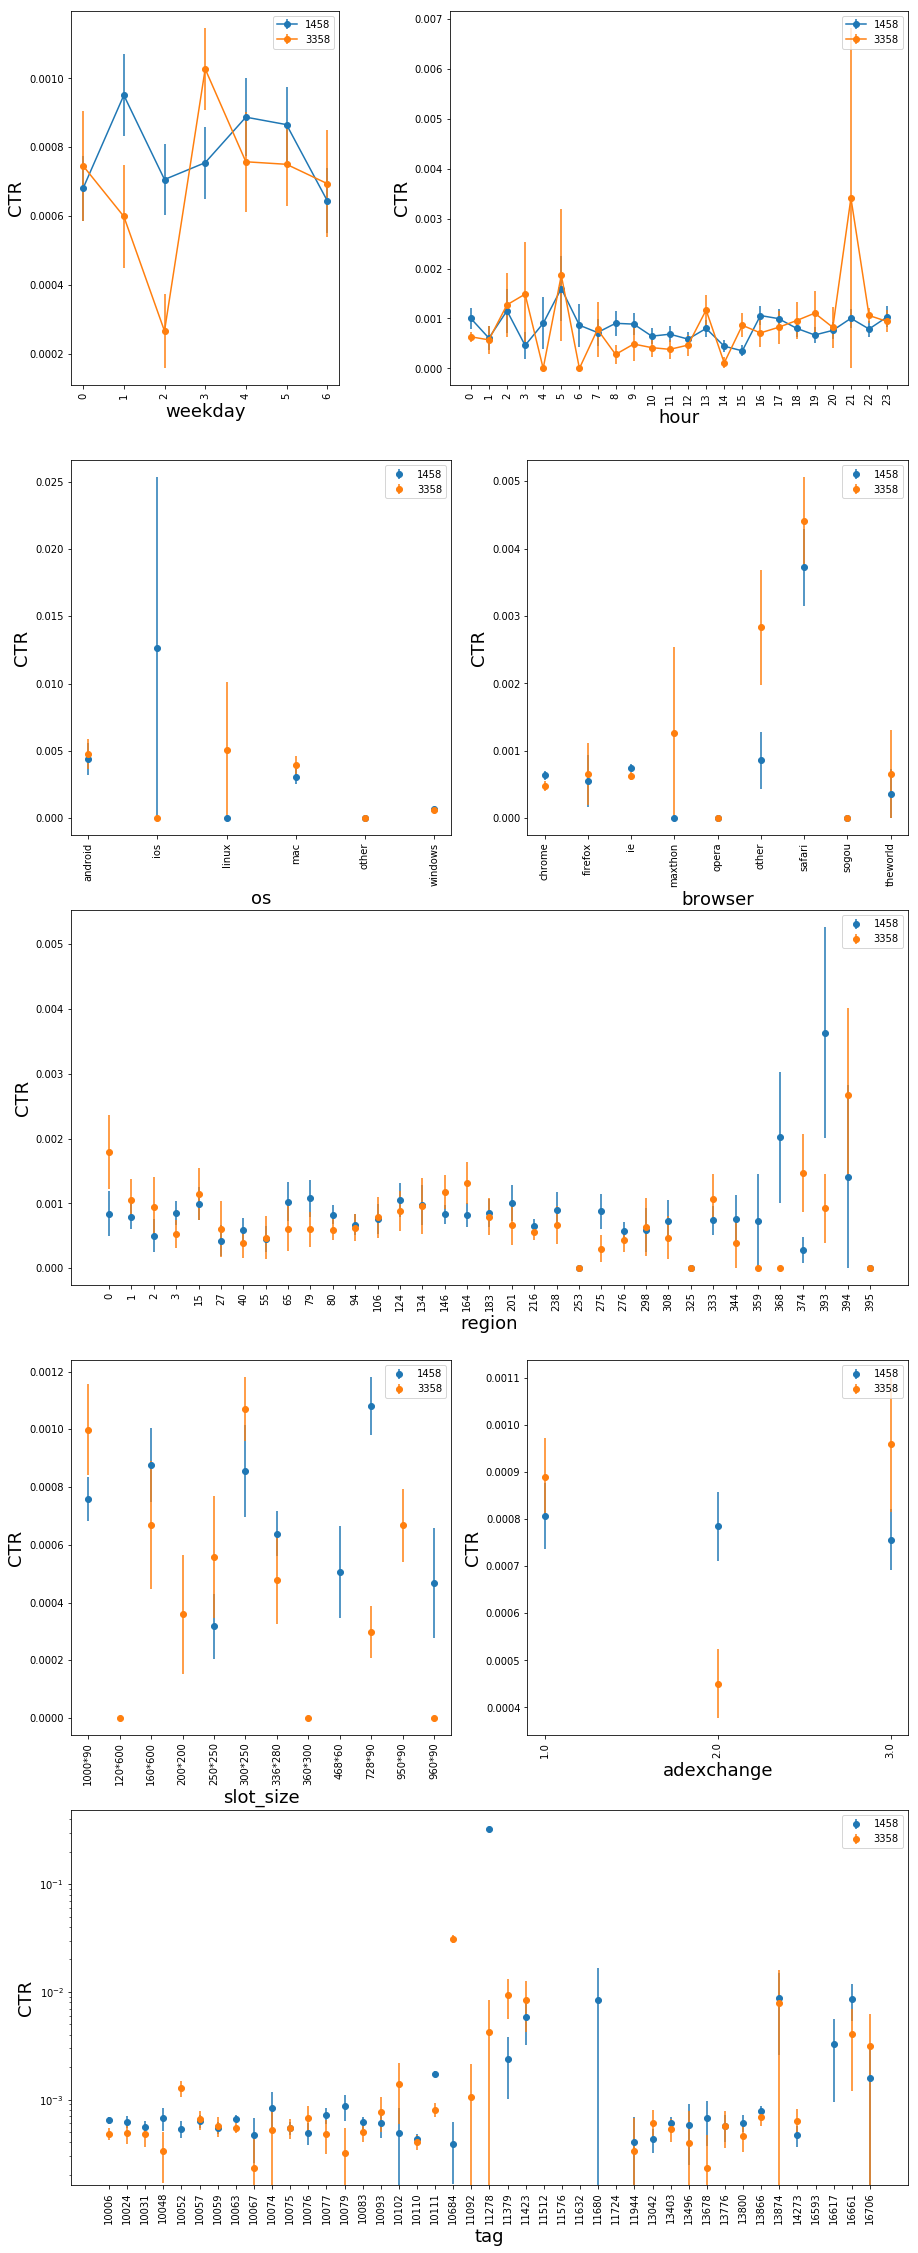

<Figure size 432x288 with 0 Axes>

In [12]:
import numpy as np
import matplotlib.pyplot as plt
 
plt.figure(figsize=(15,40))

plt.sca(plt.subplot2grid((5, 9), (0, 0), colspan=3))
x = weekdays + 1
y1, y2 = ctr_value('weekday')
plot_advertisers(x, y1, y2, 'weekday', line = True)
plt.gca().xaxis.label.set_size(18)
plt.gca().yaxis.label.set_size(18)
# for tick in plt.gca().get_xticklabels():
#     tick.set_size(20)

plt.sca(plt.subplot2grid((5, 9), (0, 4), colspan=5))
hours = train['hour'].unique()
hours.sort()
x = hours
y1, y2 = ctr_value('hour')
plot_advertisers(x, y1, y2, 'hour', line = True)
plt.gca().xaxis.label.set_size(18)
plt.gca().yaxis.label.set_size(18)
# for tick in plt.gca().get_xticklabels():
#     tick.set_size(20)

# plt.sca(plt.subplot2grid((2, 2), (1, 0), colspan=2))
plt.sca(plt.subplot2grid((5, 2), (1, 0)))
x = train['os'].unique()
x.sort()
y1, y2 = ctr_value('os')
plot_advertisers(x, y1, y2, 'os', line = False)
plt.gca().xaxis.label.set_size(18)
plt.gca().yaxis.label.set_size(18)
# for tick in plt.gca().get_xticklabels():
#     tick.set_size(20)
    
plt.sca(plt.subplot2grid((5, 2), (1, 1)))
x = train['browser'].unique()
x.sort()
y1, y2 = ctr_value('browser')
plot_advertisers(x, y1, y2, 'browser', line = False)
plt.gca().xaxis.label.set_size(18)
plt.gca().yaxis.label.set_size(18)
# for tick in plt.gca().get_xticklabels():
#     tick.set_size(20)

plt.sca(plt.subplot2grid((5, 2), (2, 0), colspan=2))
x = train['region'].unique()
x.sort()
y1, y2 = ctr_value('region')
# plt.figure(figsize=(15,5))
plot_advertisers(x, y1, y2, 'region', line = False)
plt.gca().xaxis.label.set_size(18)
plt.gca().yaxis.label.set_size(18)
# for tick in plt.gca().get_xticklabels():
#     tick.set_size(20)
    
plt.sca(plt.subplot2grid((5, 2), (3, 0)))
x = train['slot_size'].unique()
x.sort()
y1, y2 = ctr_value('slot_size')
# plt.figure(figsize=(10,5))
plot_advertisers(x, y1, y2, 'slot_size', line = False)
plt.gca().xaxis.label.set_size(18)
plt.gca().yaxis.label.set_size(18)
# for tick in plt.gca().get_xticklabels():
#     tick.set_size(20)
    
plt.sca(plt.subplot2grid((5, 2), (3, 1)))
adexchange = train_1458['adexchange'].unique()
adexchange.sort()
x = adexchange
y1, y2 = ctr_value('adexchange')
plot_advertisers(x, y1, y2, 'adexchange', line = False)
plt.gca().xaxis.label.set_size(18)
plt.gca().yaxis.label.set_size(18)
# for tick in plt.gca().get_xticklabels():
#     tick.set_size(20)
    
plt.sca(plt.subplot2grid((5, 2), (4, 0), colspan=2))
x, y1, y2 = ctr_value_tag()
# plt.figure(figsize=(20,5))
plot_advertisers(x, y1, y2, 'tag', line = False)
plt.gca().set_yscale('log')
plt.gca().xaxis.label.set_size(18)
plt.gca().yaxis.label.set_size(18)
# for tick in plt.gca().get_xticklabels():
#     tick.set_size(20)
plt.savefig('ctr.pdf', pad_inches=0, bbox_inches='tight')
plt.show()
plt.savefig("1.png")

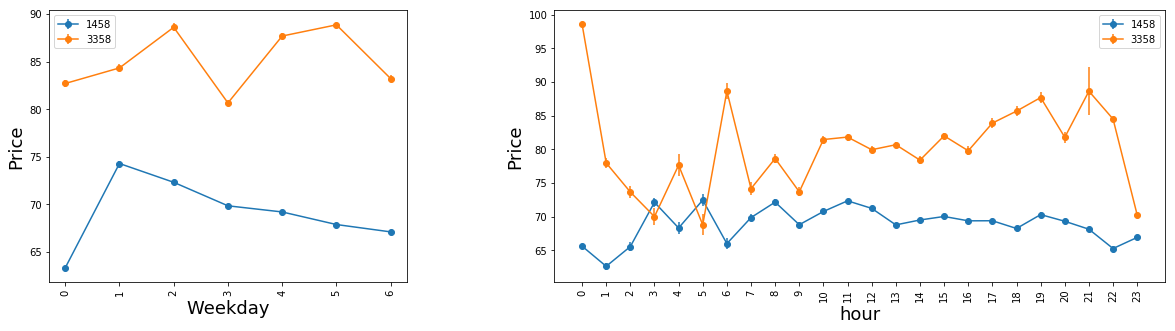

In [21]:
import numpy as np
import matplotlib.pyplot as plt
 
plt.figure(figsize=(20,5))

plt.sca(plt.subplot2grid((1, 9), (0, 0), colspan=3))
x = weekdays + 1
y1, y2 = price_value('weekday')
plot_advertisers_price(x, y1, y2, 'Weekday', line = True)
plt.gca().xaxis.label.set_size(18)
plt.gca().yaxis.label.set_size(18)



plt.sca(plt.subplot2grid((1, 9), (0, 4), colspan=5))
hours = train['hour'].unique()
hours.sort()
x = hours
y1, y2 = price_value('hour')
plot_advertisers_price(x, y1, y2, 'hour', line = True)
plt.gca().xaxis.label.set_size(18)
plt.gca().yaxis.label.set_size(18)


plt.savefig('p12.pdf', pad_inches=0, bbox_inches='tight')
plt.show()

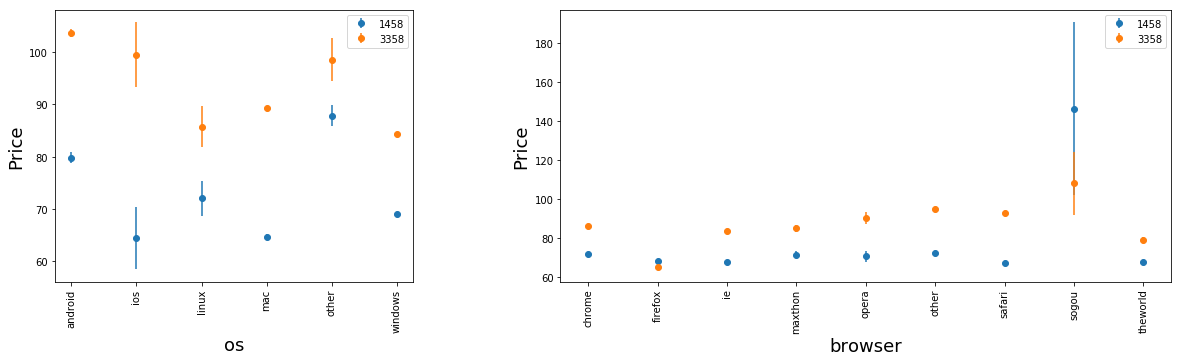

In [22]:
import numpy as np
import matplotlib.pyplot as plt



 
plt.figure(figsize=(20,5))

plt.sca(plt.subplot2grid((1, 9), (0, 0), colspan=3))
x = train['os'].unique()
x.sort()
y1, y2 = price_value('os')
plot_advertisers_price(x, y1, y2, 'os', line = False)
plt.gca().xaxis.label.set_size(18)
plt.gca().yaxis.label.set_size(18)


plt.sca(plt.subplot2grid((1, 9), (0, 4), colspan=5))
x = train['browser'].unique()
x.sort()
y1, y2 = price_value('browser')
plot_advertisers_price(x, y1, y2, 'browser', line = False)
plt.gca().xaxis.label.set_size(18)
plt.gca().yaxis.label.set_size(18)




plt.savefig('p22.pdf', pad_inches=0, bbox_inches='tight')
plt.show()

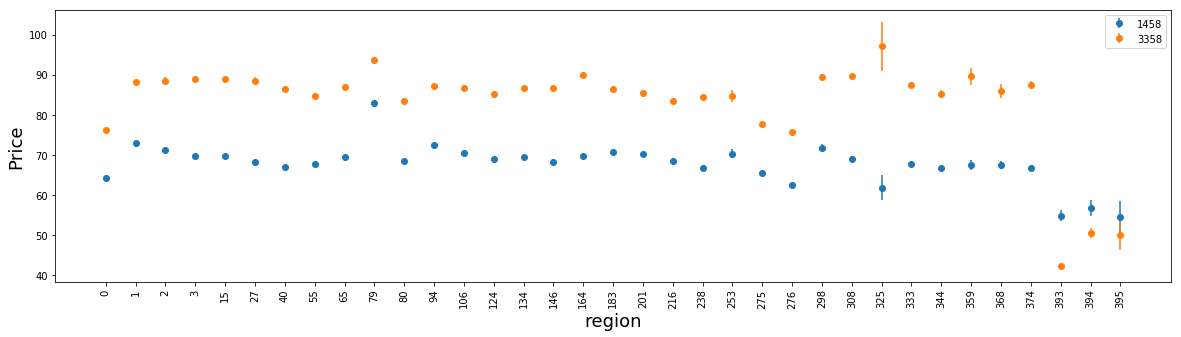

In [23]:
import numpy as np
import matplotlib.pyplot as plt



 
plt.figure(figsize=(20,5))


plt.sca(plt.subplot2grid((1, 9), (0, 0), colspan=9))
x = train['region'].unique()
x.sort()
y1, y2 = price_value('region')
# plt.figure(figsize=(15,5))
plot_advertisers_price(x, y1, y2, 'region', line = False)
plt.gca().xaxis.label.set_size(18)
plt.gca().yaxis.label.set_size(18)


plt.savefig('p31.pdf', pad_inches=0, bbox_inches='tight')
plt.show()

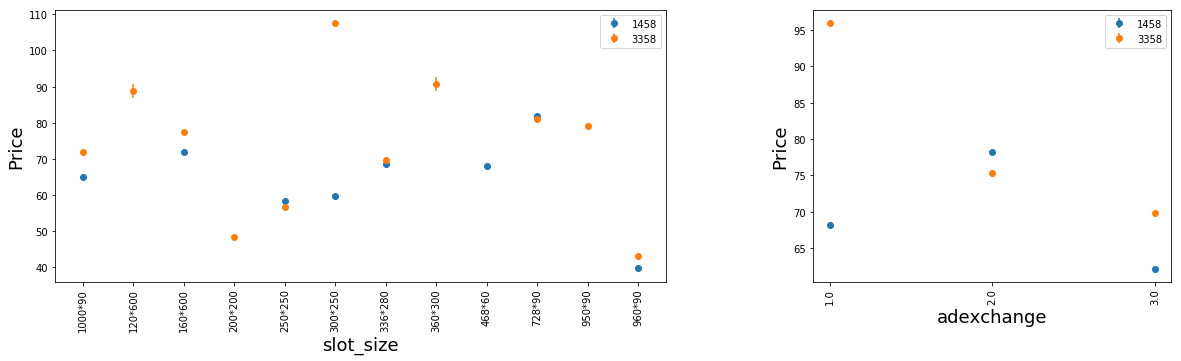

In [24]:
import numpy as np
import matplotlib.pyplot as plt



 
plt.figure(figsize=(20,5))

plt.sca(plt.subplot2grid((1, 9), (0, 0), colspan=5))
x = train['slot_size'].unique()
x.sort()
y1, y2 = price_value('slot_size')
# plt.figure(figsize=(10,5))
plot_advertisers_price(x, y1, y2, 'slot_size', line = False)
plt.gca().xaxis.label.set_size(18)
plt.gca().yaxis.label.set_size(18)


plt.sca(plt.subplot2grid((1, 9), (0, 6), colspan=3))
adexchange = train_1458['adexchange'].unique()
adexchange.sort()
x = adexchange
y1, y2 = price_value('adexchange')
plot_advertisers_price(x, y1, y2, 'adexchange', line = False)
plt.gca().xaxis.label.set_size(18)
plt.gca().yaxis.label.set_size(18)




plt.savefig('p42.pdf', pad_inches=0, bbox_inches='tight')
plt.show()

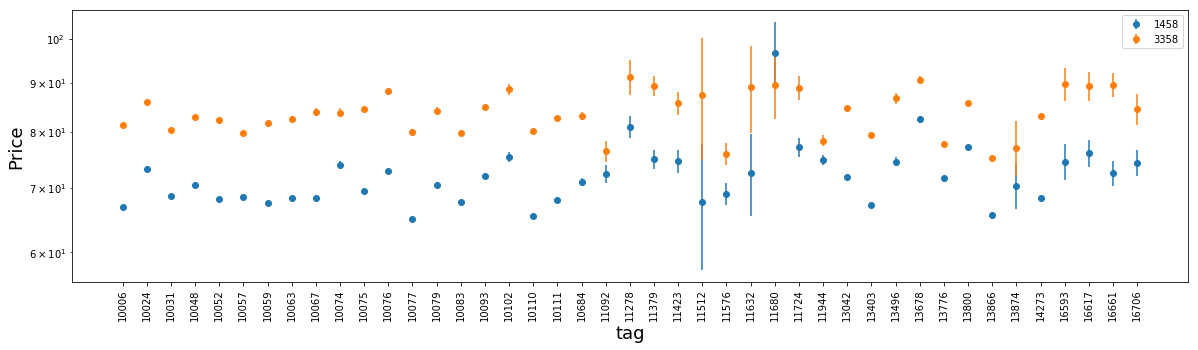

In [25]:
import numpy as np
import matplotlib.pyplot as plt



 
plt.figure(figsize=(20,5))


plt.sca(plt.subplot2grid((1, 9), (0, 0), colspan=9))
x, y1, y2 = price_value_tag()

# plt.figure(figsize=(20,5))
plot_advertisers_price(x, y1, y2, 'tag', line = False)
plt.gca().set_yscale('log')
plt.gca().xaxis.label.set_size(18)
plt.gca().yaxis.label.set_size(18)


plt.savefig('p51.pdf', pad_inches=0, bbox_inches='tight')
plt.show()